In [1]:
# Carga del dataset
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
data, target = housing.data, housing.target
target *= 100  # rescalar el target en k$

In [2]:
# Modelo a entrenar
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

regressor = DecisionTreeRegressor()
# regressor = LinearRegression()

In [3]:
# Cálculo de errores de training y test
import pandas as pd
from sklearn.model_selection import cross_validate, ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2)
cv_results = cross_validate(regressor, data, target,
                            cv=cv, scoring="neg_mean_absolute_error",
                            return_train_score=True, n_jobs=2)
cv_results = pd.DataFrame(cv_results)
print(cv_results)

    fit_time  score_time  test_score   train_score
0   0.223489    0.005002  -46.833187 -3.604352e-15
1   0.210150    0.003999  -46.115518 -1.139829e-14
2   0.204023    0.003002  -45.910212 -1.438298e-14
3   0.211758    0.003001  -45.447980 -1.486838e-14
4   0.222286    0.002512  -46.187102 -1.145681e-14
5   0.224334    0.003002  -46.343357 -1.161861e-14
6   0.218359    0.004003  -44.712471 -3.053544e-15
7   0.219355    0.003002  -45.621016 -1.062716e-14
8   0.214836    0.003000  -46.683958 -3.704186e-15
9   0.210992    0.003002  -47.269813 -6.255117e-15
10  0.203377    0.003003  -47.065570 -3.855658e-15
11  0.199383    0.002996  -47.035876 -1.102649e-14
12  0.227773    0.003001  -47.393262 -3.335833e-15
13  0.222482    0.005078  -47.174362 -3.662875e-15
14  0.194546    0.003003  -45.461599 -3.604352e-15
15  0.194678    0.004903  -46.261110 -3.483863e-15
16  0.209378    0.004000  -46.463054 -1.326415e-14
17  0.203377    0.004001  -45.834488 -1.525395e-14
18  0.215161    0.004108  -45.7

In [4]:
# La validación cruzada utiliza el error absoluto medio negativo. 
# Transformamos el error absoluto medio negativo en un error absoluto medio positivo.

scores = pd.DataFrame()
scores[["train error", "test error"]] = -cv_results[
    ["train_score", "test_score"]]

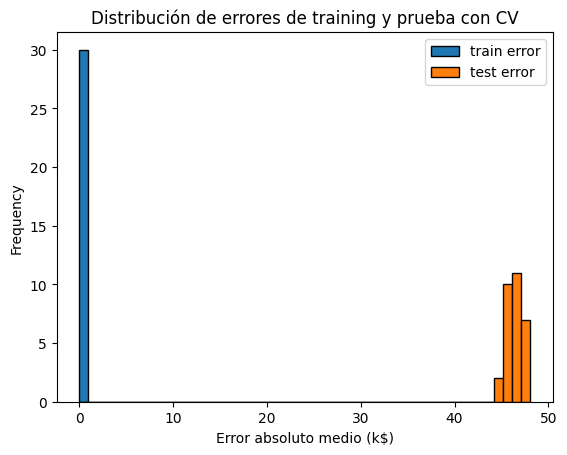

In [5]:
import matplotlib.pyplot as plt

scores.plot.hist(bins=50, edgecolor="black")
plt.xlabel("Error absoluto medio (k$)")
_ = plt.title("Distribución de errores de training y prueba con CV")

Obtenemos información sobre si nuestro modelo se ajusta demasiado (**over-fitting**), se ajusta mal(**under-fitting**), o ambos.

El **error de training es prácticamente cero**, lo que significa que el modelo NO hace under-fitting (es suficientemente flexible como para capturar cualquier variación presente en el conjunto de entrenamiento).

El **error de prueba significativamente mayor** nos dice que el modelo se ajusta demasiado: ha memorizado muchas variaciones del conjunto de entrenamiento y **no generalizan** para hacer una buena predicción en el conjunto de prueba.